In [14]:
import pandas as pd
import data_cleaner as dc

# Preparação da Base de Dados:
Primeiro iremos ler o csv da base de dados e observar suas colunas:

In [15]:
df = dc.csv_to_dataframe("censo_escolar_2021.csv")
pd.set_option('display.max_columns', None)
df

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,NO_MICRORREGIAO,CO_MICRORREGIAO,CO_DISTRITO,CO_ENTIDADE,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,DS_ENDERECO,NU_ENDERECO,DS_COMPLEMENTO,NO_BAIRRO,CO_CEP,NU_DDD,NU_TELEFONE,TP_SITUACAO_FUNCIONAMENTO,CO_ORGAO_REGIONAL,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,IN_VINCULO_SECRETARIA_EDUCACAO,IN_VINCULO_SEGURANCA_PUBLICA,IN_VINCULO_SECRETARIA_SAUDE,IN_VINCULO_OUTRO_ORGAO,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,NU_CNPJ_ESCOLA_PRIVADA,NU_CNPJ_MANTENEDORA,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SALAS_EMPRESA,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_TEMPLO_IGREJA,IN_LOCAL_FUNC_CASA_PROFESSOR,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_FILTRADA,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_OUTROS,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_LIXO_JOGA_OUTRA_AREA,IN_LIXO_OUTROS,IN_LIXO_RECICLA,IN_TRATAMENTO_LIXO_SEPARACAO,IN_TRATAMENTO_LIXO_REUTILIZA,IN_TRATAMENTO_LIXO_RECICLAGEM,IN_TRATAMENTO_LIXO_INEXISTENTE,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_DENTRO_PREDIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,IN_BANHEIRO_CHUVEIRO,IN_BERCARIO,IN_BIBLIOTECA,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_DESPENSA,IN_DORMITORIO_ALUNO,IN_DORMITORIO_PROFESSOR,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_PISCINA,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_MUSICA_CORAL,IN_SALA_ESTUDIO_DANCA,IN_SALA_MULTIUSO,IN_SALA_DIRETORIA,IN_SALA_LEITURA,IN_SALA_PROFESSOR,IN_SALA_REPOUSO_ALUNO,IN_SECRETARIA,IN_SALA_ATENDIMENTO_ESPECIAL,IN_TERREIRAO,IN_VIVEIRO,IN_DEPENDENCIAS_PNE,IN_LAVANDERIA,IN_DEPENDENCIAS_OUTRAS,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_SINAL_SONORO,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_EXISTENTES,QT_SALAS_UTILIZADAS_DENTRO,QT_SALAS_UTILIZADAS_FORA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,QT_SALAS_UTILIZADAS_ACESSIVEIS,IN_EQUIP_PARABOLICA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SCANNER,IN_EQUIP_NENHUM,IN_EQUIP_DVD,QT_EQUIP_DVD,IN_EQUIP_SOM,QT_EQUIP_SOM,IN_EQUIP_TV,QT_EQUIP_TV,IN_EQUIP_LOUSA_DIGITAL,QT_EQUIP_LOUSA_DIGITAL,IN_EQUIP_MULTIMIDIA,QT_EQUIP_MULTIMIDIA,IN_EQUIP_VIDEOCASSETE,IN_EQUIP_RETROPROJETOR,IN_EQUIP_FAX,IN_EQUIP_FOTO,QT_EQUIP_VIDEOCASSETE,QT_EQUIP_PARABOLICA,QT_EQUIP_COPIADORA,QT_EQUIP_RETROPROJETOR,QT_EQUIP_IMPRESSORA,QT_EQUIP_IMPRESSORA_MULT,QT_EQUIP_FAX,QT_EQUIP_FOTO,QT_COMP_ALUNO,IN_DESKTOP_ALUNO,QT_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,QT_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,QT_TABLET_ALUNO,QT_COMPUTADOR,QT_COMP_ADMINISTRATIVO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,QT_FUNC

A ideia é analisar o acesso à internet das escolas dos estados da região Norte do Brasil, contando o número de escolas que não tem acesso a internet em cada estado da região Norte. Vamos então analisar a coluna IN_INTERNET, que diz justamente se a escola possui ou não acesso à internet. Primeiramente, vamos retirar todas as colunas que não vão ser utilizadas:

In [16]:
colunas_selecionadas = df.loc[:, ["NO_REGIAO", "NO_UF", "IN_INTERNET"]]
colunas_selecionadas

,NO_REGIAO,NO_UF,IN_INTERNET
0,Norte,Rond⌠nia,0
1,Norte,Rond⌠nia,1
2,Norte,Rond⌠nia,0
3,Norte,Rond⌠nia,1
4,Norte,Rond⌠nia,1
...,...,...,...
80600,Nordeste,Alagoas,1
80601,Nordeste,Alagoas,1
80602,Nordeste,Alagoas,1
80603,Nordeste,Alagoas,1


Agora filtrando para somente os registros da região Norte:

In [17]:
colunas_selecionadas = colunas_selecionadas[colunas_selecionadas["NO_REGIAO"] == "Norte"]
colunas_selecionadas

,NO_REGIAO,NO_UF,IN_INTERNET
0,Norte,Rond⌠nia,0
1,Norte,Rond⌠nia,1
2,Norte,Rond⌠nia,0
3,Norte,Rond⌠nia,1
4,Norte,Rond⌠nia,1
...,...,...,...
26090,Norte,Tocantins,1
26091,Norte,Tocantins,0
26092,Norte,Tocantins,0
26093,Norte,Tocantins,1


Note que o número de linhas diminuiu para somente 26095. Vamos agora corrigir o nomme dos estados, cujos acentos e "Ç" não estão sendo lidos de maneira correta. Para isso utilizaremos uma função criada no módulo data_cleaner:

In [18]:
colunas_selecionadas = dc.corrige_nome_estados(colunas_selecionadas)
colunas_selecionadas

c:\Users\lfama\OneDrive - Fundacao Getulio Vargas - FGV\2º Período\Linguagem de Programação\a1_lp\data_cleaner.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo["NO_UF"] = df_censo["NO_UF"].replace("Rond⌠nia", "Rondônia") #substitui o nome errado dos estados pelo certo
c:\Users\lfama\OneDrive - Fundacao Getulio Vargas - FGV\2º Período\Linguagem de Programação\a1_lp\data_cleaner.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_censo["NO_UF"] = df_censo["NO_UF"].replace("Parß", "Pará")
c:

,NO_REGIAO,NO_UF,IN_INTERNET
0,Norte,Rondônia,0
1,Norte,Rondônia,1
2,Norte,Rondônia,0
3,Norte,Rondônia,1
4,Norte,Rondônia,1
...,...,...,...
26090,Norte,Tocantins,1
26091,Norte,Tocantins,0
26092,Norte,Tocantins,0
26093,Norte,Tocantins,1


Agora que já está tudo pronto, vamos ver que tipo de valores temos na coluna IN_INTERNET:

In [19]:
colunas_selecionadas["IN_INTERNET"].value_counts()

IN_INTERNET
0    15091
1    11004
Name: count, dtype: int64

Os valores da coluna IN_INTERNET são 0 ou 1. Olhando o dicionário da dados vemos que 0 significa que a escola não tem acesso a internet e 1 que a escola tem acesso. Vamos contar o número de registros por estado, para ter uma noção de proporção de escolas sem internet por estado e número de escolar registradas:

In [20]:
numero_de_escolas = colunas_selecionadas.groupby('NO_UF')['IN_INTERNET'].count().sort_values()
numero_de_escolas

NO_UF
Amapá          934
Roraima        941
Rondônia      1431
Acre          1734
Tocantins     2409
Amazonas      6251
Pará         12395
Name: IN_INTERNET, dtype: int64

Agora vamos descartar todos os registros com 1, para contar o número de escoalas sem internet por estado:

In [21]:
escolas_sem_internet = colunas_selecionadas[colunas_selecionadas["IN_INTERNET"] == 0]
escolas_sem_internet

,NO_REGIAO,NO_UF,IN_INTERNET
0,Norte,Rondônia,0
2,Norte,Rondônia,0
9,Norte,Rondônia,0
15,Norte,Rondônia,0
19,Norte,Rondônia,0
...,...,...,...
26087,Norte,Tocantins,0
26088,Norte,Tocantins,0
26089,Norte,Tocantins,0
26091,Norte,Tocantins,0


Agora basta agruparmos por estado, contarmos o número de ocorrências e ordenarmos de maneira crescente que vamos ter uma series pandas perfeita para fazer uma visualização:

In [22]:
n_escolas_sem_internet = escolas_sem_internet.groupby('NO_UF')['IN_INTERNET'].count().sort_values()
n_escolas_sem_internet

NO_UF
Rondônia      313
Amapá         461
Roraima       507
Tocantins    1001
Acre         1170
Amazonas     4147
Pará         7492
Name: IN_INTERNET, dtype: int64

De acordo com a base de dados, em 2021 em cada estado do Norte o número de escolas sem acesso à internet é este indicado acima. Vamos partir agora a montagem da visualização:

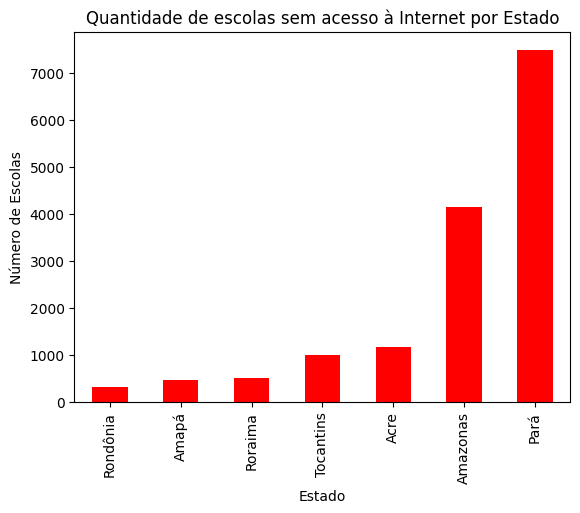

In [24]:
import matplotlib.pyplot as plt

n_escolas_sem_internet.plot(kind='bar', color='red')
plt.xlabel('Estado')
plt.ylabel('Número de Escolas')
plt.title('Quantidade de escolas sem acesso à Internet por Estado')
plt.show()